Successfully created the directory C:/Users/brnma/THAW-rf_boxplots 


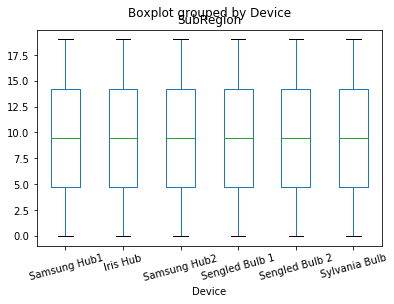

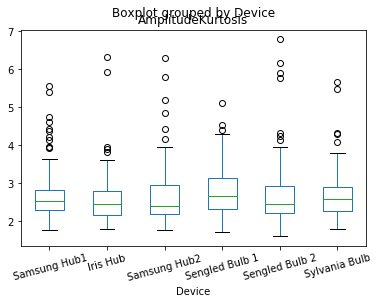

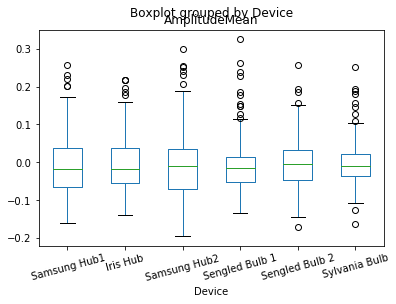

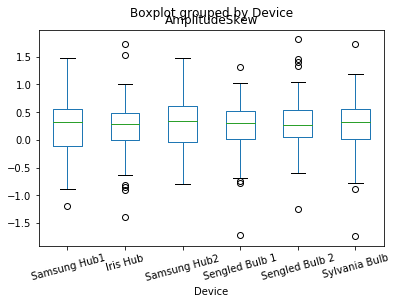

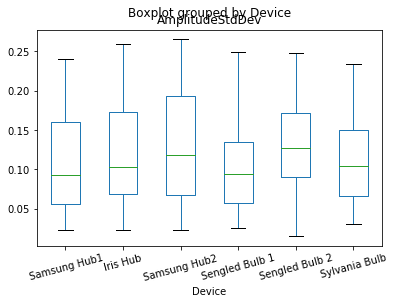

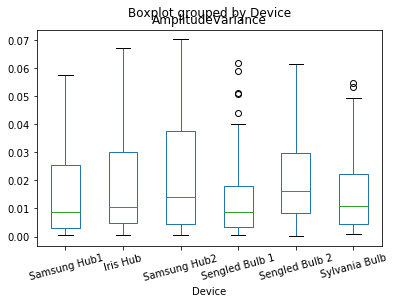

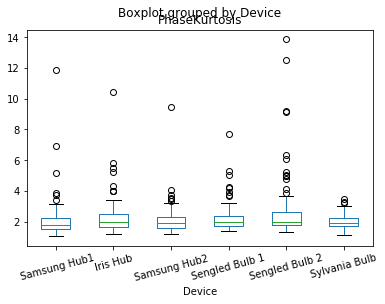

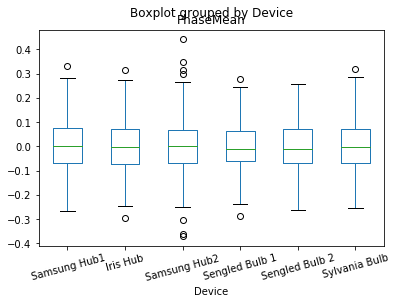

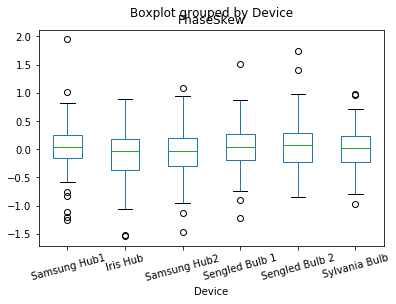

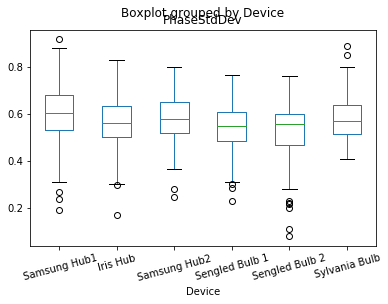

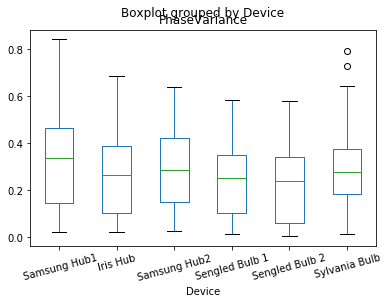

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import shutil

# This program is meant to help visualize the distribution of features collected by MSU
# Manzi Bryan, Summer 2019
# KotzGroup


path=r'C:/Users/brnma/msudata.csv'
saveToDir = r'C:/Users/brnma/THAW-rf_boxplots'

df = pd.read_csv(path)

df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)#Remove unnecessary columns from the index
#     df.drop(df.columns[df.columns.str.contains('SubRegion',case = False)],axis = 1, inplace = True)#Remove unnecessary columns from the index
def visualize(df):
    try:
        os.mkdir(saveToDir)
    except OSError:  
        print ("Creation of the directory %s failed" % saveToDir)
        answer = input("Directory %s (probably) already existed, to remove directory enter 'yes': " % saveToDir)
        if answer == 'yes' or answer == 'y':
            try:
                shutil.rmtree(saveToDir) 
                os.mkdir(saveToDir)
            except OSError:
                print ("Creation of the directory %s failed again" % saveToDir)
            else: 
                print ("Successfully deleted then created the directory.")
                print("Go to %s directory to find boxplots " % saveToDir)
    else:  
        print ("Successfully created the directory %s " % saveToDir)
    
    for col in df.columns:
        if not (col == 'Burst' or col == 'Device'):
            df.boxplot(by='Device', column=str(col), grid=False)
            plt.xticks(rotation=15)
            plt.savefig(saveToDir + '/' + col + '.pdf')
            
        
        
visualize(df)
